In [111]:
import pandas as pd

plot_folder = "Yeast"
data = pd.read_csv("Yeast/Yeast.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [112]:
X.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [113]:
y.describe()

count     1484
unique      10
top        CYT
freq       463
Name: localization_site, dtype: object

In [114]:
y = y.to_numpy().ravel()

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

num_features = X.shape[1]
num_outputs = len(set(y))
num_avg = (num_features + num_outputs) // 2

hidden_layers = [
    (),
    (num_avg,),
    (num_avg, num_avg),
    (num_avg, num_outputs),
    (num_features, num_avg, num_outputs),
]

models = []
y_train_preds, y_test_preds = [], []
acc_train, acc_test = [], []
prec_train, prec_test = [], []
rec_train, rec_test = [], []
f1_train, f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(X_train, y_train)
    models.append(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.591407       0.569024         0.607072   
1          (9,)        0.605729       0.589226         0.599730   
2        (9, 9)        0.590564       0.569024         0.579282   
3       (9, 10)        0.610783       0.579125         0.600141   
4    (8, 9, 10)        0.583825       0.582492         0.562626   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.570474      0.591407     0.569024        0.575294       0.554426  
1        0.573369      0.605729     0.589226        0.595796       0.576511  
2        0.552137      0.590564     0.569024        0.582153       0.556991  
3        0.567435      0.610783     0.579125        0.599563       0.571039  
4        0.548799      0.583825     0.582492        0.567024       0.562322  


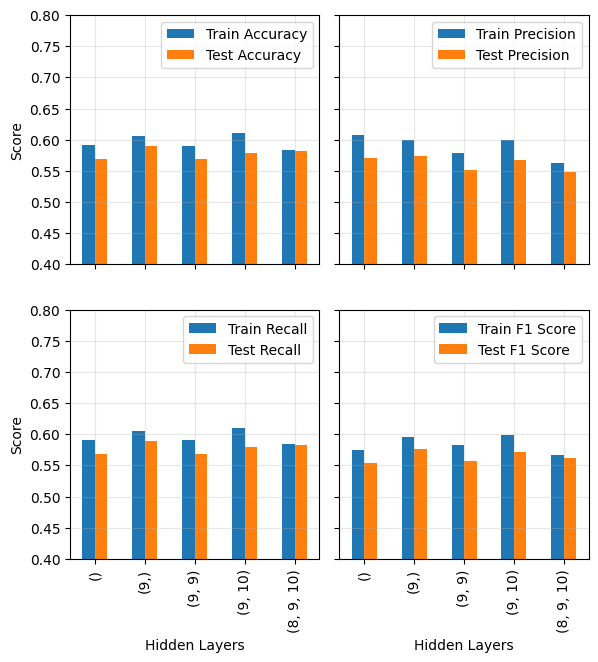

In [117]:
import pandas as pd

results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            acc_train,
            acc_test,
            prec_train,
            prec_test,
            rec_train,
            rec_test,
            f1_train,
            f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.4, 0.8), ylabel="Score"
    )
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.grid(alpha=0.3)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/scores.png", dpi=300)

In [118]:
import shap

shap.initjs()

In [119]:
X100 = shap.utils.sample(X_train, 100)

In [120]:
explainer = shap.KernelExplainer(model.predict_proba, X100, feature_names=X.columns)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/297 [00:00<?, ?it/s]

100%|██████████| 297/297 [00:36<00:00,  8.10it/s]


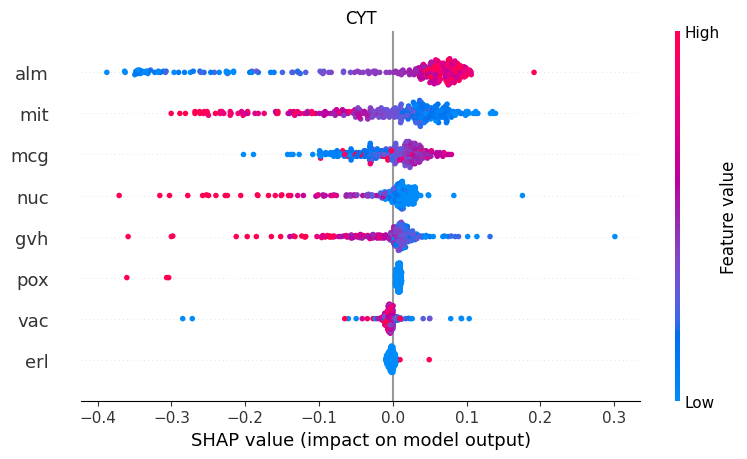

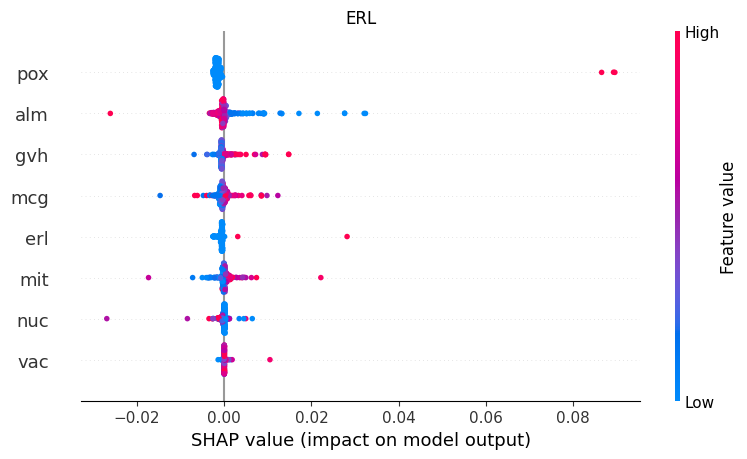

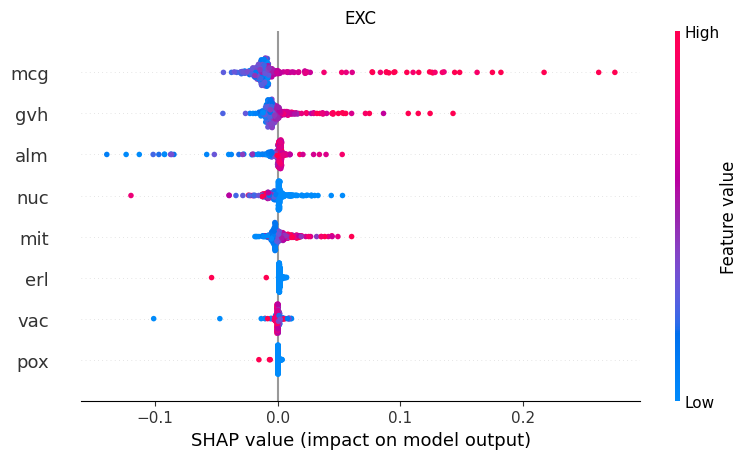

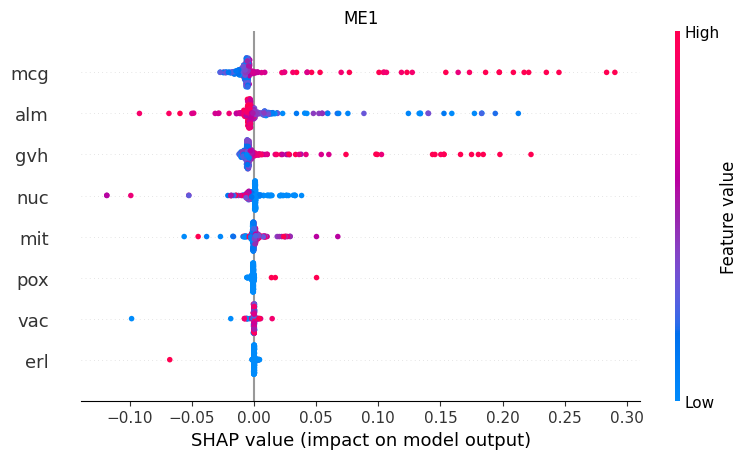

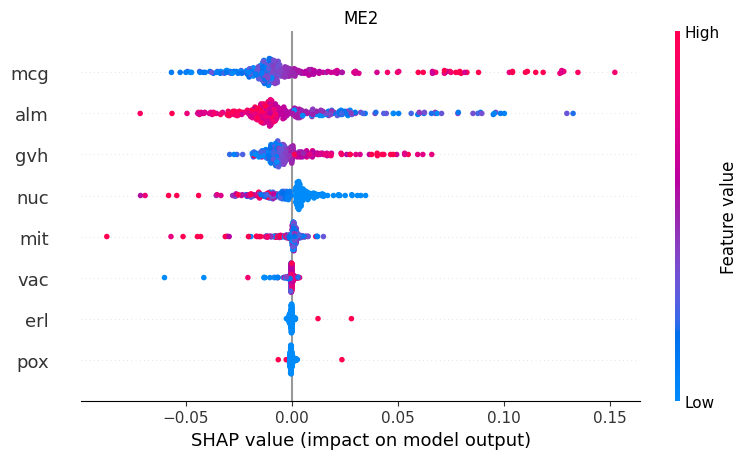

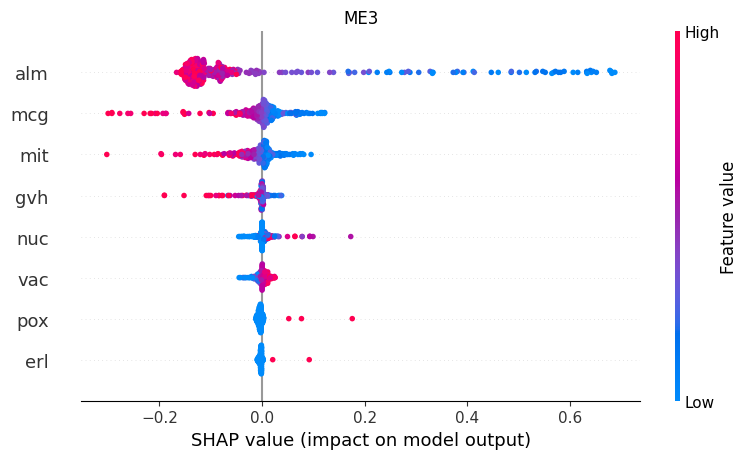

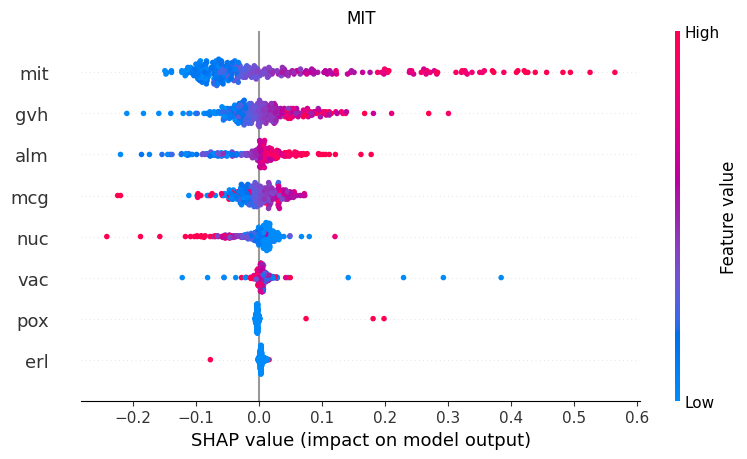

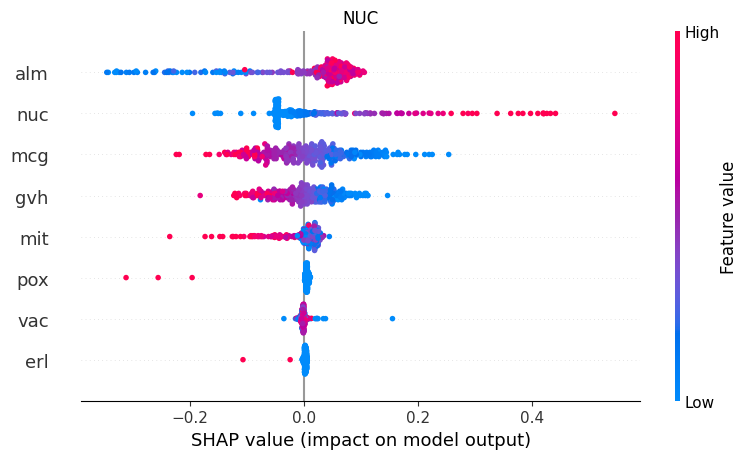

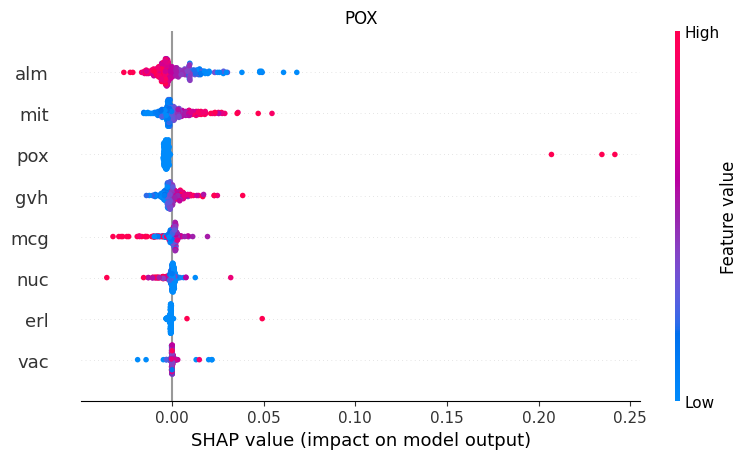

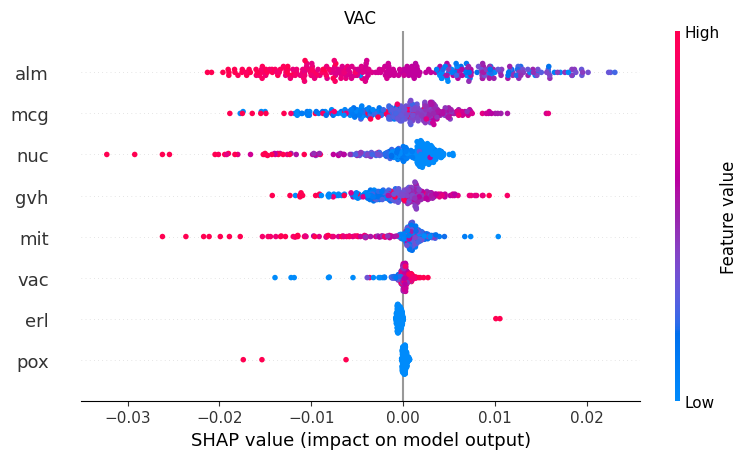

In [121]:
for i, class_name in enumerate(model.classes_):
    per_class_explanation = shap.Explanation(
        shap_values[:, :, i], data=X_test, feature_names=X.columns
    )
    shap.plots.beeswarm(per_class_explanation, show=False)
    plt.gca().set_title(f"{class_name}")
    plt.tight_layout()
    plt.savefig(f"{plot_folder}/per_class_beeswarm_class_{class_name}.png", dpi=300)
    plt.show()

In [122]:
import numpy as np

per_class_mean_abs_shap = {}

for i, class_name in enumerate(model.classes_):
    per_class_mean_abs_shap[class_name] = np.mean(np.abs(shap_values[:, :, i]), axis=0)

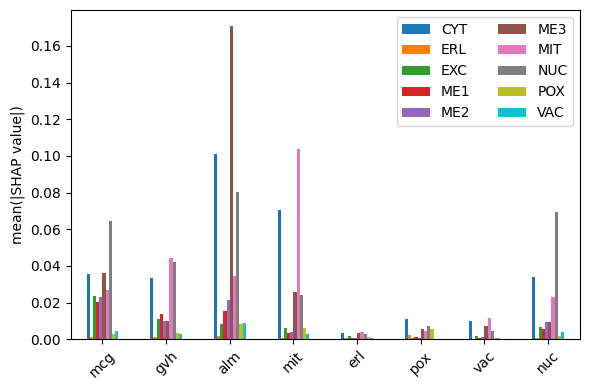

In [123]:
fig, ax = plt.subplots(figsize=(6, 4))

df = pd.DataFrame(per_class_mean_abs_shap)
df.plot.bar(ax=ax)

ax.set_xticklabels(X.columns, rotation=45)
ax.legend(ncols=2)
ax.set_ylabel(r"mean(|SHAP value|)")

plt.tight_layout()
fig.savefig(f"{plot_folder}/per_class_mean_abs_shap.png", dpi=300)
plt.show()

In [124]:
preds = model.predict(X_test)

actual_prediction_shap_values = []

for i, pred in enumerate(preds):
    actual_prediction_shap_values.append(
        shap_values[i][:, model.classes_.tolist().index(pred)]
    )

actual_prediction_shap_values = np.array(actual_prediction_shap_values)

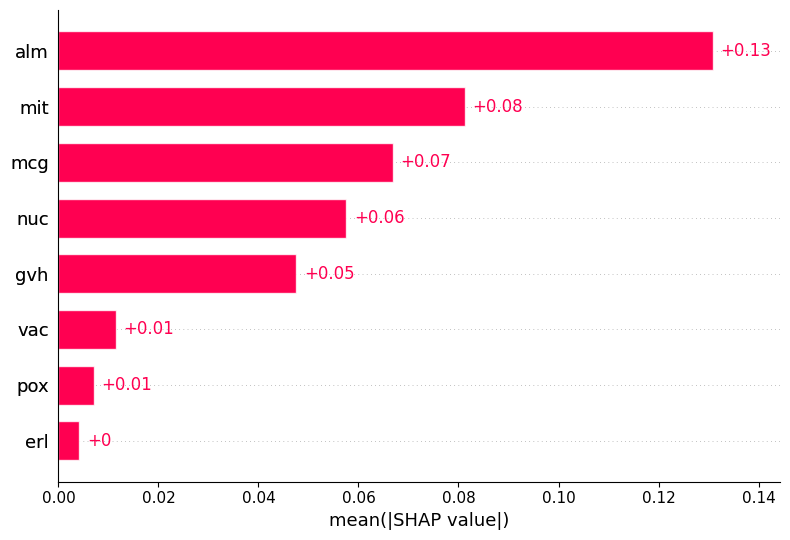

In [125]:
explanation = shap.Explanation(actual_prediction_shap_values, feature_names=X.columns)
shap.plots.bar(explanation, show=False)
plt.tight_layout()
plt.savefig(f"{plot_folder}/actual_prediction_mean_abs_shap_values.png", dpi=300)
plt.show()

In [126]:
cols_to_remove = ["vac", "pox", "erl"]
cols_idx_to_remove = np.flatnonzero(np.isin(X.columns, cols_to_remove))
print(cols_idx_to_remove)

mask = np.ones(num_features, dtype=bool)
mask[cols_idx_to_remove]=False

[4 5 6]


In [127]:
new_X_train = X_train[:, mask]
new_X_test = X_test[:, mask]

In [128]:
new_models = []
new_y_train_preds, new_y_test_preds = [], []
new_acc_train, new_acc_test = [], []
new_prec_train, new_prec_test = [], []
new_rec_train, new_rec_test = [], []
new_f1_train, new_f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(new_X_train, y_train)
    models.append(model)

    y_train_pred = model.predict(new_X_train)
    y_test_pred = model.predict(new_X_test)
    
    new_y_train_preds.append(y_train_pred)
    new_y_test_preds.append(y_test_pred)

    new_acc_train.append(accuracy_score(y_train, y_train_pred))
    new_acc_test.append(accuracy_score(y_test, y_test_pred))
    new_prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    new_prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    new_rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    new_rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    new_f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    new_f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.575400       0.555556         0.562663   
1          (9,)        0.573715       0.572391         0.555847   
2        (9, 9)        0.567818       0.558923         0.548592   
3       (9, 10)        0.570345       0.569024         0.551642   
4    (8, 9, 10)        0.602359       0.589226         0.587722   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.525200      0.575400     0.555556        0.553648       0.532110  
1        0.547408      0.573715     0.572391        0.558072       0.552920  
2        0.531843      0.567818     0.558923        0.554666       0.542468  
3        0.540639      0.570345     0.569024        0.557125       0.550702  
4        0.571822      0.602359     0.589226        0.585866       0.573371  


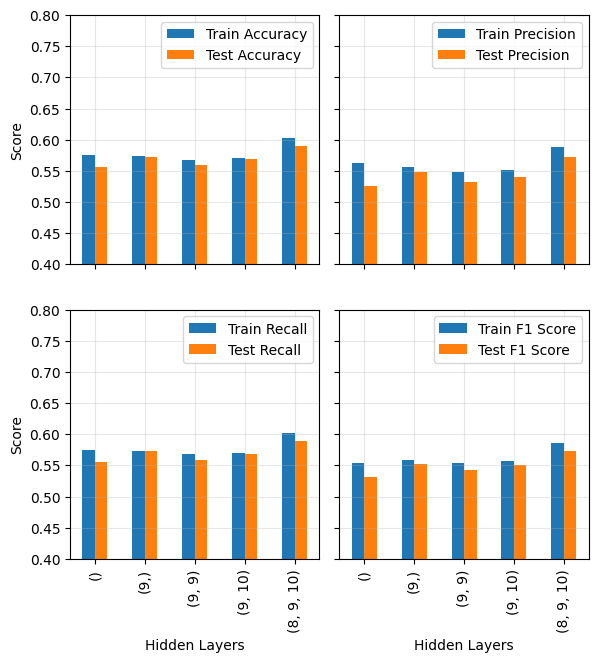

In [129]:
results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            new_acc_train,
            new_acc_test,
            new_prec_train,
            new_prec_test,
            new_rec_train,
            new_rec_test,
            new_f1_train,
            new_f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.4, 0.8), ylabel="Score"
    )
    ax.grid(alpha=0.3)
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/new_scores.png", dpi=300)

In [130]:
for i, hidden_layer in enumerate(hidden_layers):
    matches_train = sum(
        old == new for old, new in zip(new_y_train_preds[i], y_train_preds[i])
    )
    size_train = len(y_train_preds[i])
    matches_test = sum(
        old == new for old, new in zip(new_y_test_preds[i], y_test_preds[i])
    )
    size_test = len(y_test_preds[i])
    print(f"Hidden Layer {hidden_layer}:")
    print(f"\tTrain Matches: {matches_train}/{size_train} ({matches_train/size_train*100:.2f}%)")
    print(f"\tTest Matches: {matches_test}/{size_test} ({matches_test/size_test*100:.2f}%)")

Hidden Layer ():
	Train Matches: 1133/1187 (95.45%)
	Test Matches: 285/297 (95.96%)
Hidden Layer (9,):
	Train Matches: 997/1187 (83.99%)
	Test Matches: 252/297 (84.85%)
Hidden Layer (9, 9):
	Train Matches: 989/1187 (83.32%)
	Test Matches: 264/297 (88.89%)
Hidden Layer (9, 10):
	Train Matches: 933/1187 (78.60%)
	Test Matches: 230/297 (77.44%)
Hidden Layer (8, 9, 10):
	Train Matches: 966/1187 (81.38%)
	Test Matches: 249/297 (83.84%)
